## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
from keras import Sequential 
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

%run ../model_preparation/import_model_data.ipynb
%store -r model_df

print(model_df.head())


[ 4  5  6  7  8  9 10 11 12  1  2  3]
False
                       time siteID  occupied_count  is_holiday  temperature  \
0 2018-04-25 04:00:00-07:00      1             0.0       False    11.327001   
1 2018-04-25 04:00:00-07:00      2             0.0       False    11.327001   
2 2018-04-25 05:00:00-07:00      1             0.0       False    11.277000   
3 2018-04-25 05:00:00-07:00      2             1.0       False    11.277000   
4 2018-04-25 06:00:00-07:00      1             0.0       False    11.527000   

                      weather_description    Weekday  
0  Clouds generally forming or developing  Wednesday  
1  Clouds generally forming or developing  Wednesday  
2  Clouds generally forming or developing  Wednesday  
3  Clouds generally forming or developing  Wednesday  
4  Clouds generally forming or developing  Wednesday  


## Data preparation

In [2]:
df = model_df
df['Year'] = model_df['time'].dt.year
df['Month'] = model_df['time'].dt.month
df['Day'] = model_df['time'].dt.day
df['Hour'] = model_df['time'].dt.hour
df.drop('time', axis=1, inplace=True)
df

,siteID,occupied_count,is_holiday,temperature,weather_description,Weekday,Year,Month,Day,Hour
0,1,0.0,False,11.327001,Clouds generally forming or developing,Wednesday,2018,4,25,4
1,2,0.0,False,11.327001,Clouds generally forming or developing,Wednesday,2018,4,25,4
2,1,0.0,False,11.277000,Clouds generally forming or developing,Wednesday,2018,4,25,5
3,2,1.0,False,11.277000,Clouds generally forming or developing,Wednesday,2018,4,25,5
4,1,0.0,False,11.527000,Clouds generally forming or developing,Wednesday,2018,4,25,6
...,...,...,...,...,...,...,...,...,...,...
59427,2,0.0,False,14.427000,Clouds generally forming or developing,Tuesday,2021,9,14,5
59428,1,1.0,False,13.777000,Clouds generally forming or developing,Tuesday,2021,9,14,6
59429,2,0.0,False,13.777000,Clouds generally forming or developing,Tuesday,2021,9,14,6
59430,1,1.0,False,13.727000,Clouds generally forming or developing,Tuesday,2021,9,14,7


In [3]:
# Convert categorial variables into dummy-variables
df = pd.get_dummies(df, columns=['siteID', 'is_holiday', 'Weekday', 'weather_description'])
df.sample(5)

,occupied_count,temperature,Year,Month,Day,Hour,siteID_1,siteID_2,is_holiday_False,is_holiday_True,...,Weekday_Tuesday,Weekday_Wednesday,weather_description_Cloud development not observed or not observable,weather_description_Clouds generally dissolving or becoming less developed,weather_description_Clouds generally forming or developing,"weather_description_Drizzle, not freezing, continuous","weather_description_Drizzle, not freezing, intermittent moderate","weather_description_Rain, not freezing, continuous","weather_description_Rain, not freezing, intermittent moderate",weather_description_State of sky on the whole unchanged
1178,0.0,19.526999,2018,5,19,17,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
31173,27.0,16.876999,2020,2,3,13,False,True,True,False,...,False,False,True,False,False,False,False,False,False,False
41389,0.0,22.977000,2020,9,3,10,False,True,True,False,...,False,False,True,False,False,False,False,False,False,False
47244,1.0,10.777000,2021,1,3,9,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
58271,0.0,18.126999,2021,8,21,3,False,True,True,False,...,False,False,True,False,False,False,False,False,False,False


## Initializing and Training the Neural Network

In [4]:
# Defining inputs and output
X = df.drop("occupied_count", axis=1)
y = df["occupied_count"]

In [5]:
# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Normalizing training data
st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)

In [7]:
# Define model
model = Sequential(
    [Dense(25, activation="relu", input_shape=[X_train.shape[1]]),
     Dropout(rate=0.1),
    Dense(25, activation="relu"),
     Dropout(rate=0.2),
     Dense(25, activation="relu"),
     Dense(1)])

In [8]:
# Compiling the ANN
model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                625       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1951 (7.62 KB)
Trainable params: 1951 (7.6

In [10]:
# Fitting the ANN to the Training set
history = model.fit(X_train_scaled, y_train.values, epochs=30, validation_split=0.2)

Epoch 1/30


1041/1041 [==============================] - 5s 3ms/step - loss: 123.7475 - mae: 6.7484 - mse: 123.7475 - val_loss: 88.8100 - val_mae: 5.3559 - val_mse: 88.8100
Epoch 2/30
1041/1041 [==============================] - 3s 2ms/step - loss: 80.1819 - mae: 5.0859 - mse: 80.1819 - val_loss: 63.2752 - val_mae: 4.2719 - val_mse: 63.2752
Epoch 3/30
1041/1041 [==============================] - 3s 3ms/step - loss: 65.9257 - mae: 4.5056 - mse: 65.9257 - val_loss: 47.9295 - val_mae: 3.8215 - val_mse: 47.9295
Epoch 4/30
1041/1041 [==============================] - 3s 2ms/step - loss: 54.6938 - mae: 4.0527 - mse: 54.6938 - val_loss: 33.7092 - val_mae: 3.2841 - val_mse: 33.7092
Epoch 5/30
1041/1041 [==============================] - 3s 3ms/step - loss: 43.1319 - mae: 3.6332 - mse: 43.1319 - val_loss: 26.0893 - val_mae: 2.9085 - val_mse: 26.0893
Epoch 6/30
1041/1041 [==============================] - 3s 3ms/step - loss: 38.5566 - mae: 3.4150 - mse: 38.5566 - val_loss: 22.8771 - val_mae: 2.

## Evaluate the Neural Network

In [11]:
#Prediction on train set
model.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 133ms/step


array([[-2.2157133e-02],
       [ 1.2552796e+01],
       [-3.0182022e-01],
       [ 2.6701811e+01],
       [ 1.2631649e-01],
       [ 7.0728240e+00],
       [ 6.2109691e-01],
       [ 1.2193205e+00],
       [-9.1554582e-02],
       [ 3.5393721e-01]], dtype=float32)

In [12]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,123.747490,6.748403,123.747490,88.809959,5.355940,88.809959
1,80.181923,5.085898,80.181923,63.275208,4.271911,63.275208
2,65.925667,4.505638,65.925667,47.929478,3.821535,47.929478
3,54.693752,4.052721,54.693752,33.709240,3.284098,33.709240
4,43.131889,3.633246,43.131889,26.089315,2.908549,26.089315
5,38.556572,3.415015,38.556572,22.877085,2.673836,22.877085
6,34.643215,3.238693,34.643215,19.862991,2.493365,19.862991
7,33.387718,3.146022,33.387718,20.519753,2.509156,20.519753
8,31.667082,3.058034,31.667082,20.513845,2.535357,20.513845
9,29.346590,2.947163,29.346590,18.155819,2.366914,18.155819


In [13]:
root_metrics_df = history_df[["mse", "val_mse"]]
root_metrics_df

,mse,val_mse
0,123.747490,88.809959
1,80.181923,63.275208
2,65.925667,47.929478
3,54.693752,33.709240
4,43.131889,26.089315
5,38.556572,22.877085
6,34.643215,19.862991
7,33.387718,20.519753
8,31.667082,20.513845
9,29.346590,18.155819


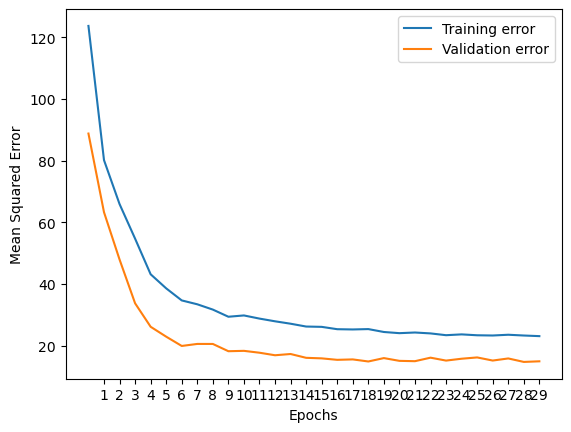

In [14]:
#Plot training error vs validation error
plt.Figure(figsize=(14,6), dpi=100)
plt.plot(root_metrics_df["mse"], label = 'Training error')
plt.plot(root_metrics_df["val_mse"], label = 'Validation error')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.xticks(range(1,30))
plt.legend()
plt.show()

In [15]:
# Prediction on test set
X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

558/558 [==============================] - 1s 2ms/step


In [16]:
# Report performance on test set
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

MSE:  16.875369084078006
MAE:  2.101436264283926
